In [1]:
#importin dependecies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
#loading dat from csv file to pandas

In [4]:
car_dataset=pd.read_csv("D:\cardata\car data.txt")

In [5]:
#To seeing first 5 row of data

In [6]:
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
#checking number of rows and col
car_dataset.shape

(205, 26)

In [8]:
#getting infromations
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
#checing missing value
car_dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
#checking distrubition on catogaries
print(car_dataset.fueltype.value_counts())
print(car_dataset.carbody.value_counts())
print(car_dataset.drivewheel.value_counts())
print(car_dataset.aspiration.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64


In [11]:
#encoding catogories data

In [40]:
#encoding fueltype
car_dataset.replace({'fueltype':{'diesel':0,'gas':1}},inplace=True)

#encoding carbody
car_dataset.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace=True)

#encoding drivewheel
car_dataset.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace=True)

car_dataset.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)
car_dataset.replace({'doornumber':{'two':0,'four':1}},inplace=True)
car_dataset.replace({'enginelocation':{'front':0,'rear':1}},inplace=True)
car_dataset.replace({'enginetype':{' dohc':0,'ohcv':1,'ohc':2}},inplace=True)

In [41]:
car_dataset.shape

(205, 26)

In [42]:
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,0,4,1,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,0,4,1,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,0,1,1,0,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,1,0,0,0,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,1,0,2,0,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [69]:
#splitting data into traget
x=car_dataSset.drop(['CarName','price'],axis=1)
y=car_dataSet['price']

In [70]:
print(x)

     car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0         1          3         1           0           0        4           1   
1         2          3         1           0           0        4           1   
2         3          1         1           0           0        1           1   
3         4          2         1           0           1        0           0   
4         5          2         1           0           1        0           2   
..      ...        ...       ...         ...         ...      ...         ...   
200     201         -1         1           0           1        0           1   
201     202         -1         1           1           1        0           1   
202     203         -1         1           0           1        0           1   
203     204         -1         0           1           1        0           1   
204     205         -1         1           1           1        0           1   

     enginelocation  wheelb

In [71]:
print(y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [72]:
#spliting data into train and testing

In [73]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.1,random_state=2)

In [74]:
#Model traing
#1.linear regression

In [75]:
#loading linear regression
lin_reg=LinearRegression()

In [76]:
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,0,4,1,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,0,4,1,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,0,1,1,0,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,1,0,0,0,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,1,0,2,0,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [79]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [80]:
#predection on traing daata
train_data=lin_reg.predict(x_train)

In [81]:
car_dataSet=car_dataset.drop(['fuelsystem'],axis=1)

In [82]:
car_dataSset=car_dataSet.drop(['enginetype','cylindernumber'],axis=1)

In [68]:
print(car_dataSset)

     car_ID  symboling                   CarName  fueltype  aspiration  \
0         1          3        alfa-romero giulia         1           0   
1         2          3       alfa-romero stelvio         1           0   
2         3          1  alfa-romero Quadrifoglio         1           0   
3         4          2               audi 100 ls         1           0   
4         5          2                audi 100ls         1           0   
..      ...        ...                       ...       ...         ...   
200     201         -1           volvo 145e (sw)         1           0   
201     202         -1               volvo 144ea         1           1   
202     203         -1               volvo 244dl         1           0   
203     204         -1                 volvo 246         0           1   
204     205         -1               volvo 264gl         1           1   

     doornumber  carbody  drivewheel  enginelocation  wheelbase  ...  \
0             0        4           1   

In [85]:
#r error score
error_score=metrics.r2_score(y_train,train_data)
print("R error score is:",error_score)

R error score is: 1.0


In [86]:
#Visualize the actual price and predected price

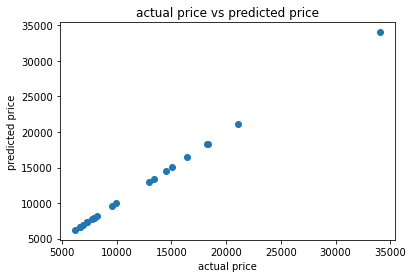

In [89]:
plt.scatter(y_train,train_data)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price")
plt.show()

In [90]:
#predection on traing daata
testdata=lin_reg.predict(x_test)

In [92]:
#r error score
error_score=metrics.r2_score(y_test,testdata)
print("R error score is:",error_score)

R error score is: -5.662262536394428


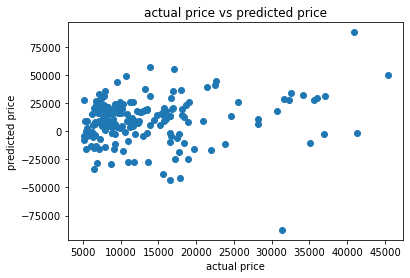

In [93]:
plt.scatter(y_test,testdata)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price")
plt.show()

In [108]:
#loading lasso regression
lass_reg=Lasso()

In [109]:
lass_reg.fit(x_train,y_train)

C:\Users\Darshan C S\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.468e+06, tolerance: 9.190e+04
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [110]:
#predection on traing daata
train_data=lass_reg.predict(x_train)

In [111]:
#r error score
error_score=metrics.r2_score(y_train,train_data)
print("R error score is:",error_score)

R error score is: 0.998155947512111


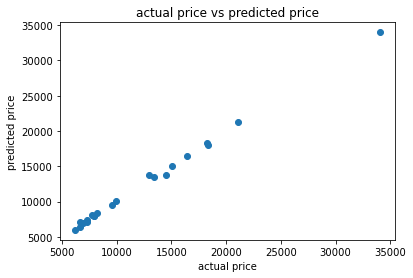

In [113]:
plt.scatter(y_train,train_data)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price")
plt.show()